### Heroes Of Pymoli Data Analysis

-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "purchase_data.csv"
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data = pd.DataFrame(purchase_data)
purchase_data

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,3.54
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7,Male,101,Final Critic,4.19


## Player Count

* Display the total number of players


In [2]:
uniq_players=purchase_data['SN'].nunique()
my_dict1={"Total Players":[uniq_players]}
pd.DataFrame(my_dict1)

,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [3]:
uniq_items = purchase_data["Item ID"].nunique()
avg_price = purchase_data["Price"].mean()
avg_price= ("${:,.2f}".format)(avg_price)
num_purch=purchase_data["Purchase ID"].nunique()
tot_rev=purchase_data["Price"].sum()
tot_rev=("${:,.2f}".format)(tot_rev)
my_dict2={"Number of Unique Items":[uniq_items],
         "Average Price":[avg_price],
         "Number of Purchases":[num_purch],
         "Total Revenue":[tot_rev]}
pd.DataFrame(my_dict2)

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [4]:
tot_player_count=purchase_data.groupby("Gender")['SN'].nunique()
gen_pct=tot_player_count/uniq_players
new_gen_pct=pd.Series(["{0:.2f}%".format(val * 100) for val in gen_pct], index = tot_player_count.index)
my_dict3={"Total Count":tot_player_count,
          "Percentage of Players":new_gen_pct}
pd.DataFrame(my_dict3)

,Total Count,Percentage of Players
Gender,,
Female,81,14.06%
Male,484,84.03%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [5]:
purch_ct_by_gender=purchase_data.groupby("Gender")["Purchase ID"].nunique()
avg_purch_price_by_gender = purchase_data.groupby("Gender")["Price"].mean()
new_avg_purch_price_by_gender=pd.Series(["${0:.2f}".format(val) for val in avg_purch_price_by_gender], index = purch_ct_by_gender.index)
tot_purch_val_by_gender=purchase_data.groupby("Gender")["Price"].sum()
new_tot_purch_val_by_gender=pd.Series(["${0:.2f}".format(val) for val in tot_purch_val_by_gender], index = purch_ct_by_gender.index)
avg_tot_purch_per_person_by_gender=tot_purch_val_by_gender/tot_player_count
new_avg_tot_purch_per_person_by_gender=pd.Series(["${0:.2f}".format(val) for val in avg_tot_purch_per_person_by_gender], index = purch_ct_by_gender.index)


my_dict4={"Purchase Count":purch_ct_by_gender,
          "Average Purchase Price":new_avg_purch_price_by_gender,
          "Total Purchase Value":new_tot_purch_val_by_gender,
          "Avg Total Purchase per Person":new_avg_tot_purch_per_person_by_gender}
pd.DataFrame(my_dict4)

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,$1967.64,$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


# Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [6]:
import numpy as np

age_bins = [0,9,14,19,24,29,34,39,150]
age_groups = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+']

purchase_data['Age Groups'] = pd.cut(purchase_data['Age'], bins=age_bins, labels=age_groups)
age_grp_ct=purchase_data.groupby("Age Groups")["SN"].nunique()
tot_player_pct=age_grp_ct/uniq_players
new_tot_player_pct = pd.Series(["{0:.2f}%".format(val * 100) for val in tot_player_pct], index = age_grp_ct.index)
my_dict5= {'Total Count': age_grp_ct,
           'Percentage of Players': new_tot_player_pct}

pd.DataFrame(my_dict5)

,Total Count,Percentage of Players
Age Groups,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [7]:
purch_ct_by_age=purchase_data.groupby("Age Groups")["SN"].count()

avg_price_by_age = purchase_data.groupby("Age Groups")["Price"].mean()
new_avg_price_by_age=pd.Series(["${0:.2f}".format(val) for val in avg_price_by_age], index = avg_price_by_age.index)

tot_purch_val_by_age=purchase_data.groupby("Age Groups")["Price"].sum()
new_tot_purch_val_by_age=pd.Series(["${0:.2f}".format(val) for val in tot_purch_val_by_age], index = avg_price_by_age.index)

avg_tot_purch_per_person_by_age=tot_purch_val_by_age/age_grp_ct
new_avg_tot_purch_per_person_by_age=pd.Series(["${0:.2f}".format(val) for val in avg_tot_purch_per_person_by_age], index = purch_ct_by_age.index)

my_dict6={'Purchase Count': purch_ct_by_age,
          'Average Purchase Price': new_avg_price_by_age,
          'Total Purchase Value':new_tot_purch_val_by_age,
          'Avg Total Purchase per Person':new_avg_tot_purch_per_person_by_age}
                
pd.DataFrame(my_dict6)

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Groups,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,$1114.06,$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [8]:
top_spenders=purchase_data[purchase_data["SN"].isin(["Lisosia93", "Idastidru52", "Chamjask73", "Iral74", "Iskadarya95"])]

ts_purch_ct=top_spenders.groupby('SN')["Item ID"].count()

ts_avg_price=top_spenders.groupby("SN")["Price"].mean()
new_ts_avg_price=pd.Series(["${0:.2f}".format(val) for val in ts_avg_price], index = ts_purch_ct.index)

ts_tot_purch_val=top_spenders.groupby("SN")["Price"].sum()
new_ts_tot_purch_val=pd.Series(["${0:.2f}".format(val) for val in ts_tot_purch_val], index = ts_purch_ct.index)

top_spenders.set_index("SN")

my_dict7={'Purchase Count': ts_purch_ct,
          'Average Purchase Price': new_ts_avg_price,
          'Total Purchase Value':new_ts_tot_purch_val}

unsorted = pd.DataFrame(my_dict7)

sorted = unsorted.sort_values(by='Total Purchase Value', ascending=False)
                
pd.DataFrame(sorted)

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.41,$13.62
Iskadarya95,3,$4.37,$13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [17]:
popular=purchase_data.loc[:, purchase_data.columns.isin(['Item ID', 'Item Name', 'Price'])]
pop_purch_ct = popular.groupby(["Item ID", "Item Name"])['Item ID'].count()
print(pop_purch_ct)



# FINISHING THE LAST TWO LATER...

Item ID  Item Name                      
0        Splinter                           4
1        Crucifer                           3
2        Verdict                            6
3        Phantomlight                       6
4        Bloodlord's Fetish                 5
                                           ..
179      Wolf, Promise of the Moonwalker    6
180      Stormcaller                        1
181      Reaper's Toll                      5
182      Toothpick                          3
183      Dragon's Greatsword                3
Name: Item ID, Length: 183, dtype: int64


# Conclusions

# 1.  The number of men playing Heroes of Pymoli is six times that of the women playing.

# 2.  When it comes to spending money in the game, however, the average woman spent about 10% more on purchases than the average man.

# 3.  That being said, gender doesn't appear to be the largest determining factor for the amount spent on purchases...age does.  People of any gender between ages 35 and 39 are the biggest spenders when it comes to supplemental purchases in Heroes of Pymoli.  (Men spent $4.07 on average, women spent $4.47, but 35 to 39-year-olds spent $4.76.)

## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



# Data Manipulation Evidence of Completion

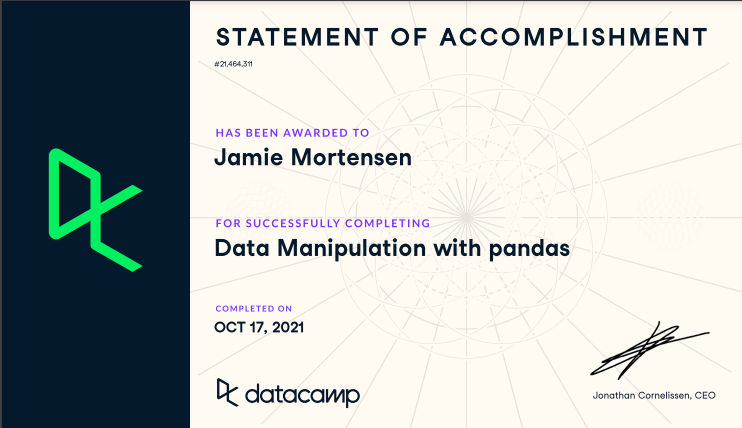